In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("/content/anxiety.csv")
df.head()

,anxiety,math
0,12,75
1,16,56
2,6,91
3,22,48
4,17,69


In [8]:
y = df.math
x = df.anxiety
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [9]:
influence = model.get_influence()
cooks = influence.cooks_distance
standardized_residuals = influence.resid_studentized_internal

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     53.10
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           9.02e-07
Time:                        19:13:27   Log-Likelihood:                -69.064
No. Observations:                  20   AIC:                             142.1
Df Residuals:                      18   BIC:                             144.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3919      4.644     22.261      0.000      93.634     113.150
anxiety       -2.1219      0.291     -7.287      0.000      -2.734      -1.510
==============================================================================
Omnibus:                        1.032   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.337
Skew:                           0.313   Prob(JB):                        0.845
Kurtosis:                       3.113   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

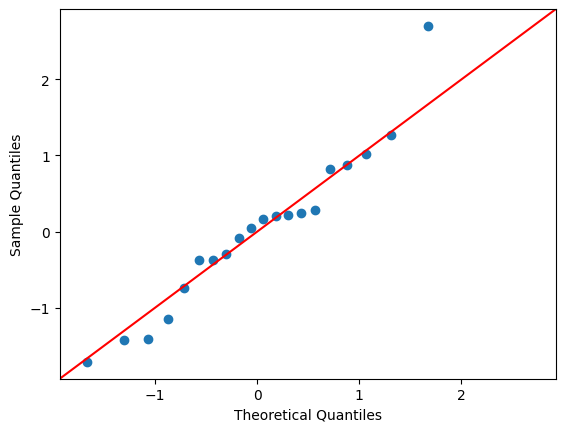

In [11]:
import matplotlib.pyplot as plt
sm.qqplot(standardized_residuals, line ='45')
plt.show()